
# Linear Regression 




Y = wX + b

Y-->Dependent Variable


X-->Independent Variable


w-->Weight


b-->Bias


# Gradient Descent


w = w - a*dw

b = b-a*db

# Learning Rate

Learning Rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving towards a minimun of a loss function

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
class Linear_Regression():
    #initiating the Hyper parameters(Learning Rate & No of Iteration)
    
    def __init__(self,learning_rate,no_of_iteration):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration
        
    def fit(self,X,y):
        
        #number of traing examples & numbers of features
        
        self.m,self.n =X.shape #number of row and columns
        
        #initialing the weight and bais
        
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y
        
        #implementing Gradient Descent
        for i in range(self.no_of_iteration):
            self.update_weight()
        
        
    def update_weight(self,):
        y_prediction = self.predict(self.X)
        
        #calculate graidents
        dw = - (2 * (self.X.T).dot(self.y - y_prediction))/self.m
        
        db = - 2 * np.sum(self.y - y_prediction)/self.m
        
        #updating weights
        self.w = self.w - self.learning_rate * dw
        
        self.b = self.b - self.learning_rate * db
        
        
    def predict(self,X):
        return X.dot(self.w) + self.b
        

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
df.shape

(30, 2)

In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
df.duplicated().sum()

0

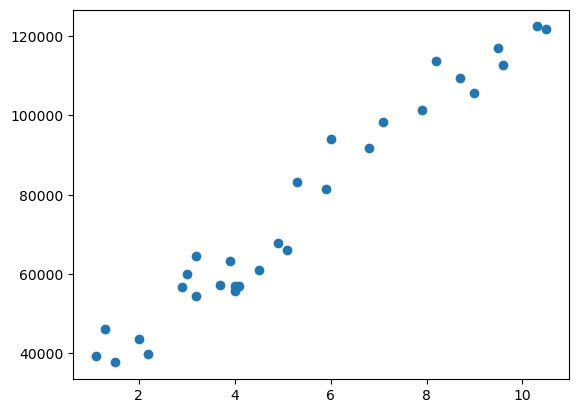

In [5]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.show()

In [37]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [38]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [39]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=7)

In [41]:
model = Linear_Regression(learning_rate=0.02,no_of_iteration=1000)

In [45]:
model.fit(X_train,y_train)

In [50]:
X_test_pred = model.predict(X_test)

In [56]:
print("Weigth : ",model.w[0])
print("Bais :",model.b)

Weigth :  9781.296286303786
Bais : 24064.098123840013


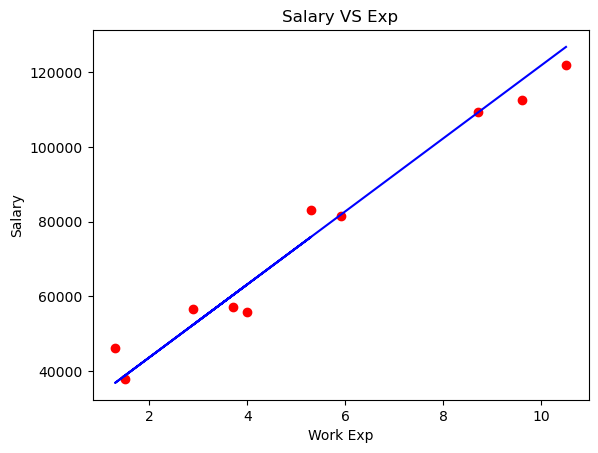

In [64]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,X_test_pred,color="blue")
plt.xlabel("Work Exp")
plt.ylabel("Salary")
plt.title("Salary VS Exp")
plt.show()